<a href="https://colab.research.google.com/github/kamangirkhan/Data110/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

These libraries will be used for analyzing accident and person datasets, visualizing fatality patterns, and exploring trends by age, gender, and other factors.

In [21]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Adding two needed datasets

In [17]:
df_accident = pd.read_csv("/content/accident.csv")
df_person = pd.read_csv("/content/person.csv")


In [6]:
print(df_accident.head())

   STATE STATENAME  ST_CASE  PEDS  PERNOTMVIT  VE_TOTAL  VE_FORMS  PVH_INVL  \
0      1   Alabama    10001     0           0         1         1         0   
1      1   Alabama    10002     0           0         1         1         0   
2      1   Alabama    10003     0           0         1         1         0   
3      1   Alabama    10004     0           0         1         1         0   
4      1   Alabama    10005     0           0         1         1         0   

   PERSONS  PERMVIT  ...  NOT_MINNAME ARR_HOUR     ARR_HOURNAME ARR_MIN  \
0        1        1  ...           20     22.0  10:00pm-10:59pm    45.0   
1        1        1  ...            8      2.0    2:00am-2:59am    23.0   
2        1        1  ...           48     23.0  11:00pm-11:59pm     8.0   
3        3        3  ...            0     19.0    7:00pm-7:59pm    44.0   
4        4        4  ...           53     15.0    3:00pm-3:59pm     8.0   

   ARR_MINNAME HOSP_HR                       HOSP_HRNAME  HOSP_MN  \
0    

In [7]:
print(df_person.head())

   STATE STATENAME  ST_CASE  VEH_NO  PER_NO  VE_FORMS  COUNTY  MONTH  \
0      1   Alabama    10001       1       1         1      13      1   
1      1   Alabama    10002       1       1         1      97      3   
2      1   Alabama    10003       1       1         1      89      3   
3      1   Alabama    10004       1       1         1      53      3   
4      1   Alabama    10004       1       2         1      53      3   

  MONTHNAME  DAY  ...  DEVTYPE  DEVTYPENAME DEVMOTOR  DEVMOTORNAME LOCATION  \
0   January    4  ...      NaN          NaN      NaN           NaN      0.0   
1     March   20  ...      NaN          NaN      NaN           NaN      0.0   
2     March   18  ...      NaN          NaN      NaN           NaN      0.0   
3     March   17  ...      NaN          NaN      NaN           NaN      0.0   
4     March   17  ...      NaN          NaN      NaN           NaN      0.0   

                  LOCATIONNAME WORK_INJ                     WORK_INJNAME  \
0  Occupant of a

Data Preparation

In [22]:

df_accident['HOUR'] = pd.to_numeric(df_accident['HOUR'], errors='coerce')
df_accident.loc[df_accident['HOUR'] == 99, 'HOUR'] = None
df_accident['MONTH'] = pd.to_numeric(df_accident['MONTH'], errors='coerce')
df_accident['YEAR'] = pd.to_numeric(df_accident['YEAR'], errors='coerce')


Number of Accidents by Hour

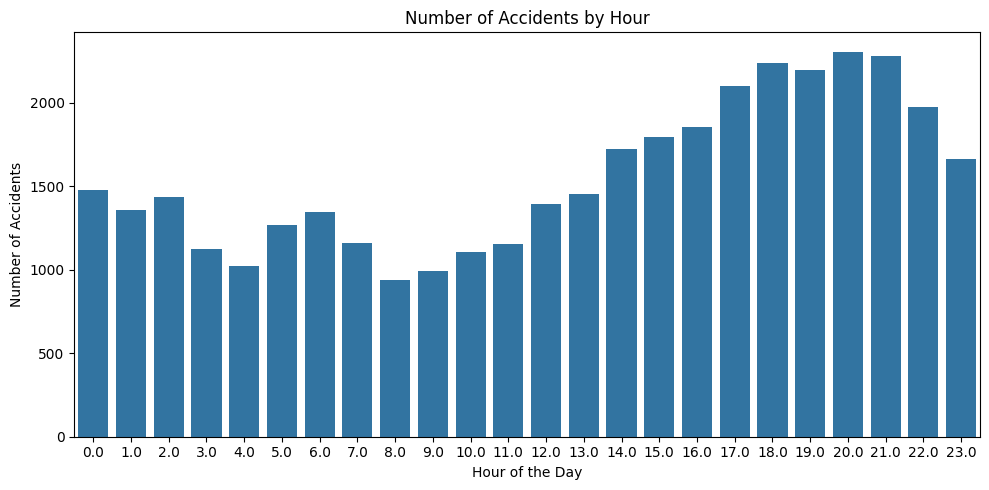

In [23]:

plt.figure(figsize=(10, 5))
sns.countplot(data=df_accident, x='HOUR', order=sorted(df_accident['HOUR'].dropna().unique()))
plt.title("Number of Accidents by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.savefig("accidents_by_hour.png")

Accidents by Weather Condition

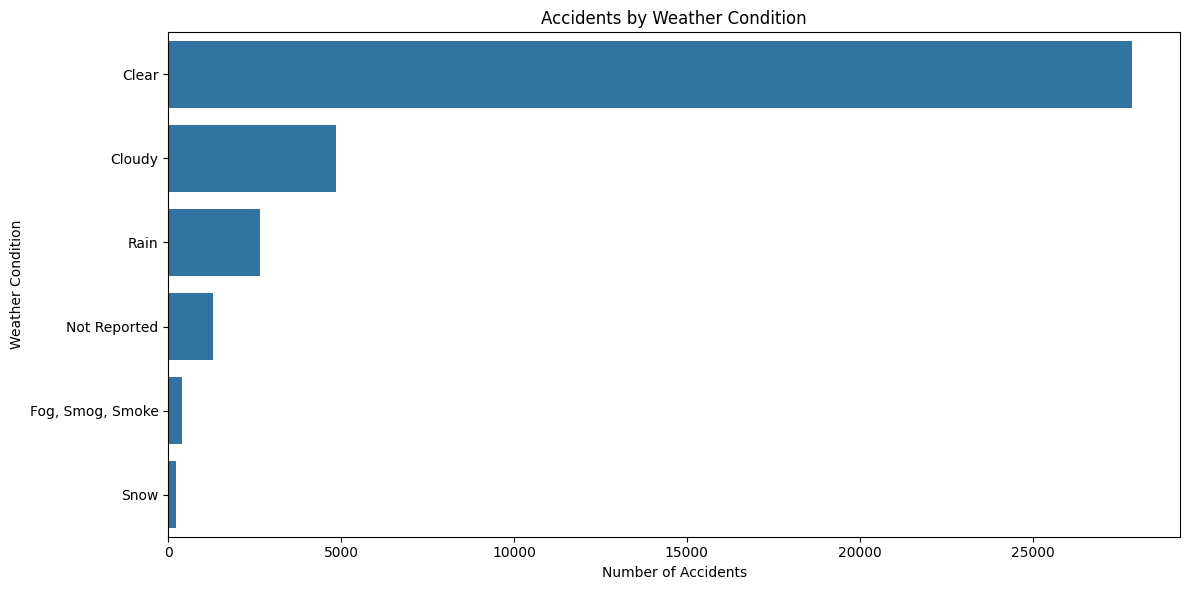

In [24]:

plt.figure(figsize=(12, 6))
sns.countplot(y='WEATHERNAME', data=df_accident, order=df_accident['WEATHERNAME'].value_counts().head(6).index)
plt.title("Accidents by Weather Condition")
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Condition")
plt.tight_layout()
plt.savefig("accidents_by_weather_condition.png")

Fatalities by Age and Gender

In [27]:

df_merged = pd.merge(df_person, df_accident, on="ST_CASE", how="left")

df_plot = df_merged[["AGE", "SEX", "FATALS"]].dropna()
df_plot = df_plot[
    (df_plot["AGE"] >= 0) & (df_plot["AGE"] < 100) & (df_plot["SEX"].isin([1, 2]))
]
df_plot["SEX"] = df_plot["SEX"].map({1: "Male", 2: "Female"})

age_gender_fatal_summary = df_plot.groupby(["AGE", "SEX"])["FATALS"].sum().reset_index()

fig = px.line(
    age_gender_fatal_summary, x="AGE", y="FATALS", color="SEX", title="Fatalities by Age and Gender ",
    labels={"FATALS": "Total Fatalities", "AGE": "Age", "SEX": "Gender"},
)

fig.show()

Fatalities by Harmful Event

https://public.tableau.com/views/TreeMap_17469281198300/Sheet1?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

Fatality Heatmap

https://public.tableau.com/app/profile/arash.kamangir/viz/TreeMap_17469281198300/Sheet2?publish=yes